# Text analysis of book reviews with NLP

## Data Loading and Exploring

This report conducted text analysis of the reviews of two books, Harry Potter 1 and 2, via NLP. Each dataset has 24 records and contains the names of the reviewers, their detailed reviews and the star rating the gave the book. They can be downloaded from  

The dataset for the sentiment analysis is reviews of "Harry Potter and the Sorcerer's Stone ((Harry Potter #1))" by J.K. Rowling taken from a book review website "goodreads": https://www.goodreads.com/book/show/3.Harry_Potter_and_the_Sorcerer_s_Stone. 24 reviews were copied from the website and stored in a csv file, with an effort to include some reviews made by reviewers who had also reviewed Harry Potter and the Chamber of Secrets (Harry Potter #2) for the similarity analysis. (Book1 could be downloaded from https://raw.githubusercontent.com/jade22/data/master/harrypotter_reviews_book1_v2.csv.)

The dataset for the similarity analysis is reviews of "Harry Potter and the Chamber of Secrets ((Harry Potter #2))" by J.K. Rowling taken from a book review website "goodreads": https://www.goodreads.com/book/show/15881.Harry_Potter_and_the_Chamber_of_Secrets. 17 of the 24 reviews in this dataset are written by the same reviewers who wrote a review for Harry Potter #1 that is included in the first dataset. (Book2 could be downloaded from https://raw.githubusercontent.com/jade22/data/master/harrypotter_reviews_book2_v2.csv.)

In [1]:
import pandas as pd 
book_1= pd.read_csv("https://raw.githubusercontent.com/jade22/data/master/harrypotter_reviews_book1_v2.csv")
book_1.head()

,reviewer_name,star_rating,review
0,Lora,5,I'm going to keep this brief since there isn't...
1,Zoë,5,I will never ever rate this lower than 5 stars...
2,Sasha Alsberg,5,Why the heck did I not read Harry Potter befor...
3,Jayson,4,(A-) 83% | Very Good\nNotes: Despite a weak cl...
4,Harold Bloom,1,Can 35 Million Book Buyers Be Wrong? Yes.\n\nT...


In [2]:
book_2= pd.read_csv("https://raw.githubusercontent.com/jade22/data/master/harrypotter_reviews_book2_v2.csv")
book_2.head()

,reviewer_name,star_rating,review
0,Lora,4,"""It is our choices, Harry, that show what we t..."
1,Zoë,5,"“It is our choices, Harry, that show what we t..."
2,Sasha Alsberg,5,JK Rowling really knows how to write a great b...
3,Jayson,4,(A-) 83% | Very Good\nNotes: A clever conjurat...
4,Amanda Patterson,1,I have nothing to say.


In [3]:
print(f'''Reviews of Harry Potter 1:

{book_1.dtypes}''')
print(f'''\n\nReviews of Harry Potter 2:

{book_2.dtypes}''')

Reviews of Harry Potter 1:

reviewer_name    object
star_rating       int64
review           object
dtype: object


Reviews of Harry Potter 2:

reviewer_name    object
star_rating       int64
review           object
dtype: object


## Data Cleaning (text correction & stop_words deletion)

As shown above, each review is a long string including several paragraphs. It's necessary to confirm there is no wrong spelling words which will disturb the following text analysis. Besides, removing stop_words from the reviews is helpful to improve the accuracy of text analysis. Therefore, we cleaned the two datasets first before the fomal analysis.

In [4]:
from textblob import TextBlob
from textblob import Word
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/JadeZHOU/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def correct_delete_stop_words(reviews):
    reviews_corr_useful = []
    for review in reviews:
        review_corrected = TextBlob(review.lower()).correct()
        review_useful_words = ' '.join([word for word in review_corrected.words if word not in stop_words])
        reviews_corr_useful.append(review_useful_words)
    print(f'{len(reviews)} reviews completed')
    return reviews_corr_useful

In [6]:
reviews1 = list(book_1['review'])
reviews_corr_useful_1 = correct_delete_stop_words(reviews1)

24 reviews completed


In [7]:
reviews2 = list(book_2['review'])
reviews_corr_useful_2 = correct_delete_stop_words(reviews2)

24 reviews completed


## Sentiment analysis

Here we conducted sentiment analysis based on the package TextBlob. Specifically, two different sentiment analyzers were employed and their accuracy rate was compared. One analyzer is TextBlob's default sentiment analyzer and the other one is the NaiveBayesAnalyzer. 

***Install necessary packages:***

Note: Run the following commands in terminal first to install necessary package:
    
    --------------------------------------
    conda install -c conda-forge textblob
    ipython -m textblob.download_corpora
    --------------------------------------

### Sentiment Analysis with TextBlob’s Default Sentiment Analyzer
We can start by using TextBlob's default senitment analyzer to analyze the reviews. TextBlob's default sentiment analyzer returns a polarity and subjectivity value. The polarity value is float between -1 and 1 where 1 is the most positive statement and -1 is the most negative statement. Subjectivity represents how muuch personal opinion, emotion or judgement is included in the text and is returned as a flat between 0 and 1 where 1 means that statement contains mostly opinion, and 0 means that statement contains mostly factual information (i.e. objective).

In [8]:
from textblob import TextBlob
book_1['polarity'] = book_1['review'].apply(lambda text: TextBlob(text).sentiment[0])
book_1['subjectivity'] = book_1['review'].apply(lambda text: TextBlob(text).sentiment[1])

# source: https://stackoverflow.com/questions/43485469/apply-textblob-in-for-each-row-of-a-dataframe

book_1

,reviewer_name,star_rating,review,polarity,subjectivity
0,Lora,5,I'm going to keep this brief since there isn't...,0.159766,0.658073
1,Zoë,5,I will never ever rate this lower than 5 stars...,0.850000,1.000000
2,Sasha Alsberg,5,Why the heck did I not read Harry Potter befor...,0.625000,1.000000
3,Jayson,4,(A-) 83% | Very Good\nNotes: Despite a weak cl...,0.585000,0.809167
4,Harold Bloom,1,Can 35 Million Book Buyers Be Wrong? Yes.\n\nT...,0.161897,0.556172
5,Amanda Patterson,1,These books terrify me.\nThey are badly writte...,-0.125000,0.722222
6,Bria,1,You're a wimp Harry.\n\nHarry is the perfect b...,0.116324,0.595749
7,Sabrina,2,"After billions of years, I finally read this b...",0.275000,0.575000
8,Nina,5,My second-favorite part of this series! I've r...,0.403409,0.709091
9,Ginger,2,"I want to like the Harry Potter novels, I real...",0.205625,0.532500


In [9]:
reviews_polar = []
reviews_subj = []
for review_words in reviews_corr_useful_1:
    reviews_polar.append(TextBlob(review_words).sentiment[0])
    reviews_subj.append(TextBlob(review_words).sentiment[1])
    
book_1['polarity'] = pd.Series(reviews_polar)
book_1['subjectivity'] = pd.Series(reviews_subj)


### Convert float polarity to category based on binning, referring from:
### https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4)
book_1['assign_rating_polar'] = pd.cut(book_1['polarity'], bins = 5,labels = [1, 2, 3, 4, 5])
book_1.head()

,reviewer_name,star_rating,review,polarity,subjectivity,assign_rating_polar
0,Lora,5,I'm going to keep this brief since there isn't...,0.173611,0.643827,3
1,Zoë,5,I will never ever rate this lower than 5 stars...,0.850000,1.000000,5
2,Sasha Alsberg,5,Why the heck did I not read Harry Potter befor...,0.200000,0.550000,3
3,Jayson,4,(A-) 83% | Very Good\nNotes: Despite a weak cl...,0.550000,0.779167,5
4,Harold Bloom,1,Can 35 Million Book Buyers Be Wrong? Yes.\n\nT...,0.162154,0.570289,3


We can evaluate how well the default sentiment analyzer worked by comparing the number of stars to the calculated polarity value. We would expect the lowest polarity value for a one star review and the highest polarity value for a five start review. As shown by the figure below, we have low polarity readings for one star reviews with a large spread in the polarity values. The polarity values are higher for two and three star reviews, and there is less spread in the polarity values for those reviews. Four star reviews have a higher average polarity value than three star reviews, but the spread of the data is larger. Five start reviews have a lower average polarity value than the four star reviews. This graph suggests that the default sentiment analyzer was the best at analyzing the sentiment of two and three star reviews.

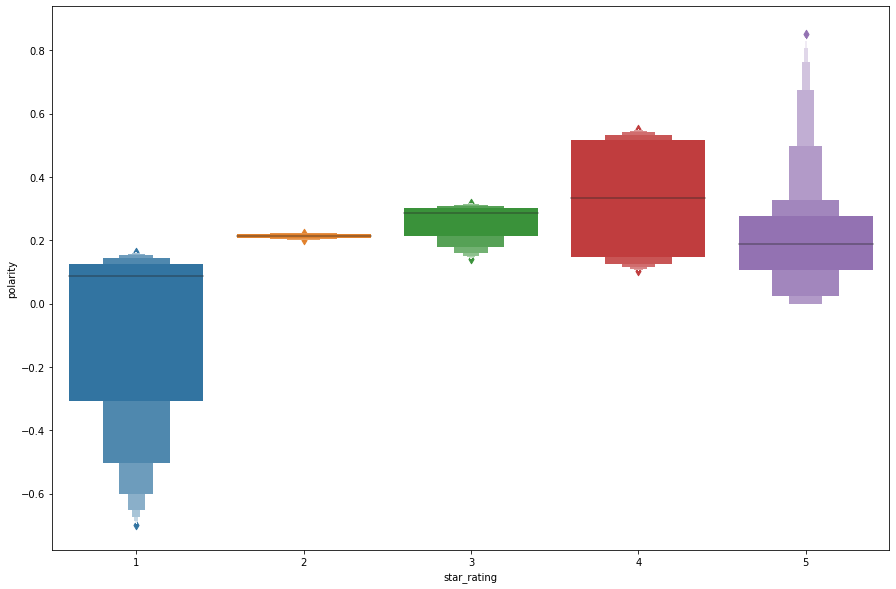

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.boxenplot(x='star_rating', y='polarity', data=book_1)
plt.show()

#### Compare assigned rating with actual star-rating

In [11]:
# show the wrong pairs
wrong_assign_act_rating = [ (assi, act) 
          for (assi, act) in zip(book_1['assign_rating_polar'], book_1['star_rating']) 
          if assi != act]
print('Wrong assignments (based on polarity):')
print(wrong_assign_act_rating)

rate_right = (len(book_1['assign_rating_polar']) - len(wrong_assign_act_rating))/len(book_1['assign_rating_polar'])
print(f"\nnumber of pairs assigned correctly = {len(book_1['assign_rating_polar']) - len(wrong_assign_act_rating)}")
print(f'        percentage of right rating = {rate_right:.2%}')

Wrong assignments (based on polarity):
[(3, 5), (3, 5), (5, 4), (3, 1), (3, 1), (3, 2), (4, 5), (3, 2), (3, 4), (3, 5), (4, 3), (3, 4), (4, 5), (3, 5), (3, 5), (4, 5), (4, 3), (3, 5), (3, 5), (3, 5)]

number of pairs assigned correctly = 4
        percentage of right rating = 16.67%


In [12]:
# show analysis score

from sklearn.metrics import classification_report
names = ['star_1', 'star_2', 'star_3' , 'star_4', 'star_5']
cr_polar = classification_report(book_1['star_rating'], book_1['assign_rating_polar'], target_names=names, zero_division = True)
print(cr_polar)

              precision    recall  f1-score   support

      star_1       1.00      0.33      0.50         3
      star_2       1.00      0.00      0.00         2
      star_3       0.07      0.33      0.11         3
      star_4       0.17      0.25      0.20         4
      star_5       0.50      0.08      0.14        12

    accuracy                           0.17        24
   macro avg       0.55      0.20      0.19        24
weighted avg       0.49      0.17      0.18        24



Since we are dealing with imbalanced classes during analysis (number of each star rating distributed unevenly), we look at the macro f1-score (which is the harmonic mean of the macro-averaged precision and recall) as well as classification accuracy. As can be seen, both the accuracy and the f1-score are very low, only 0.17 and 0.19 respectively which means the default analyzer is not a good choice.

In [13]:
# plot confusion matrix, refferring from: 
# https://github.com/prrao87/fine-grained-sentiment/blob/master/plotter.py

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, 
                          classes=[1, 2, 3, 4, 5],
                          normalize=False,
                          cmap=plt.cm.YlOrBr):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (Adapted from scikit-learn docs).
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', origin='lower', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # Show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # Label with respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel='Actual rating',
           xlabel='Assigned rating')

    # Set alignment of tick labels
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    return fig, ax

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a21180390>)

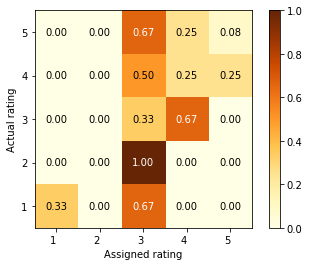

In [14]:
plot_confusion_matrix(book_1['star_rating'], book_1['assign_rating_polar'], normalize=True)

The confusion matrix plot shows more detail about which classes were most incorrectly and correctly classified by the analyzer. Looking at the cells along the anti-diagonal. Cell [1, 1] shows the percentage of reviews belonging to star_1 that the analyzer classified correctly, cell [2, 2] for correct star_2 classification, and so on. Cells away from the anti-diagonal show the percentage of wrong classifications made for each respective class. For example, from the cell [4, 5] we can see that 25% of all reviews that actually belong to star_5 are incorrectly classified as star_4 by TextBlob default analyzer. The percentage of correct classifications are all low, less than 33%

### Sentiment Analysis with the NaiveBayesAnalyzer

Next, we can try the Naive Bayes Analyzer which returns the sentiment (positive or negative), a positive percentage and a negative percentage. The original star ratings can be converted to a percentage value using the following scale: 
- 1 star: 0% - 20% 
- 2 stars: 20% - 40%
- 3 stars: 40% - 60% 
- 4 stars: 60% - 80% 
- 5 stars: 80% - 100%

In [15]:
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import Blobber

In [16]:
tb = Blobber(analyzer=NaiveBayesAnalyzer())

In [17]:
book_1[['sentiment', 'pos', 'neg']] = book_1['review'].apply(lambda v: pd.Series(tb(v).sentiment))
# source: https://www.visualist.in/sentiment-analysis-with-textblob/

book_1['pos_to_star'] = [1 if x <0.20 else 2 if x<0.40 else 3 if x<0.60 else 4 if x<0.80 else 5 for x in book_1['pos']] 
book_1['correct_star_calc'] = (book_1['pos_to_star']==book_1['star_rating']).astype(int)
book_1.head()

,reviewer_name,star_rating,review,polarity,subjectivity,assign_rating_polar,sentiment,pos,neg,pos_to_star,correct_star_calc
0,Lora,5,I'm going to keep this brief since there isn't...,0.173611,0.643827,3,pos,1.000000,3.532977e-08,5,1
1,Zoë,5,I will never ever rate this lower than 5 stars...,0.850000,1.000000,5,pos,0.644927,3.550733e-01,4,0
2,Sasha Alsberg,5,Why the heck did I not read Harry Potter befor...,0.200000,0.550000,3,neg,0.078238,9.217616e-01,1,0
3,Jayson,4,(A-) 83% | Very Good\nNotes: Despite a weak cl...,0.550000,0.779167,5,pos,0.999887,1.128192e-04,5,0
4,Harold Bloom,1,Can 35 Million Book Buyers Be Wrong? Yes.\n\nT...,0.162154,0.570289,3,pos,1.000000,1.455902e-22,5,0


#### Compare assigned rating with actual star-rating

In [18]:
# show the wrong pairs
wrong_assign_act_rating = [ (assi, act) 
          for (assi, act) in zip(book_1['pos_to_star'], book_1['star_rating']) 
          if assi != act]
print('Wrong assignments (based on NaiveBayes):')
print(wrong_assign_act_rating)

Wrong assignments (based on NaiveBayes):
[(4, 5), (1, 5), (5, 4), (5, 1), (5, 1), (3, 2), (5, 2), (5, 4), (4, 5), (5, 3), (3, 4), (2, 5), (4, 3), (5, 4)]


#### Score for Sentiment Analysis

In [19]:
total_correct = sum(book_1['correct_star_calc'])
total_values = book_1['correct_star_calc'].count()
percentage_correct = total_correct/total_values
print(f'percentage of star ratings correctly classified: {percentage_correct:.2%}')

percentage of star ratings correctly classified: 41.67%


As shown above, the calculated score for how closely the analysis matched the book ratings is 41.67%. 

In [20]:
# show analysis score

from sklearn.metrics import classification_report
cr_bayes = classification_report(book_1['star_rating'], book_1['pos_to_star'], target_names=names, zero_division = True)
print(cr_bayes)

              precision    recall  f1-score   support

      star_1       0.50      0.33      0.40         3
      star_2       0.00      0.00      0.00         2
      star_3       0.33      0.33      0.33         3
      star_4       0.00      0.00      0.00         4
      star_5       0.53      0.67      0.59        12

    accuracy                           0.42        24
   macro avg       0.27      0.27      0.27        24
weighted avg       0.37      0.42      0.39        24



The results above illustrates that the NaiveBayes analyzer has a accuracy of 0.42 and a macor f1-score of 0.27. The performance of the Naive Bayes Classifier is better than the default analyzer. 

#### Confusion Matrix

The confusion matrix below summarizes the predicted star ratings compared with the actual star ratings. Based on the matrix, the values were classified as follows:

- One-star: 1 correctly classified, 2 mis-classified as a 5 
- Two stars: 0 correctly classified, 1 mis-classified as a 3, 1 mis-classified as a 5
- Three-stars: 1 correctly classified, 1 mis-classified as 4, 1 mis-classified as 5 
- Four-stars: 0 correctly classified, 1 mis-classified as a 3 and 3 mis-classified as a 5 
- Five-stars: 8 correctly classified, 2 mis-classified as a 3, 1 mis-classified as a 2 and 1 mis-classified as a 1 

In [21]:
from sklearn.metrics import confusion_matrix


expected=book_1['star_rating']
predicted=book_1['pos_to_star']
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[1 0 0 0 2]
 [0 0 1 0 1]
 [0 0 1 1 1]
 [0 0 1 0 3]
 [1 1 0 2 8]]


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a215b4250>)

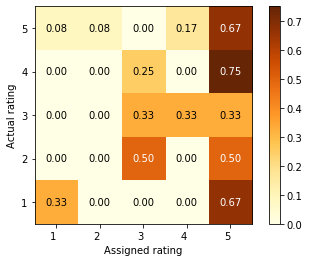

In [22]:
plot_confusion_matrix(book_1['star_rating'], book_1['pos_to_star'], normalize=True)

The confusion matrix for the NaiveBayes analyzer indicates less classes classified correctly compared to the results of Default analyzer — both star_3 and star_4 don't have correct classifications along the anti-diagonal. However, the accuracy rate of each class is greater, more than 33%. As a result, the performance of this analyzer is better than the default one.

## Similarity analysis

The similarity between every review of Dataset 1 and each review of Dataset 2 is conducted based on the package Spacy. We try to find which two reviews are written by same reviewers according to the calcualated similarity value.

***Install necessary packages:***

Note: Run the following commands in terminal first to install necessary package:

    --------------------------------------
    conda install -c conda-forge spacy
    python -m spacy download en_core_web_lg
    --------------------------------------

In [23]:
import spacy
nlp = spacy.load('en_core_web_lg') #refer from: https://spacy.io/usage/vectors-similarity
# nlp = spacy.load('en')

# '''
# Note:
# To make them compact and fast, spaCy’s small models (all packages that end in sm) don’t ship with word vectors, and only include context-sensitive tensors.
# This means you can still use the similarity() methods to compare documents, spans and tokens – but the result won’t be as good, and individual tokens won’t have any vectors assigned. 
# So in order to use real word vectors, you need to download a larger model, that is 'en_core_web_lg'.
# '''

In [24]:
similar_score = []
pair_review = []
hp1_reviewer_name = []
hp2_reviewer_name = []
for i in book_1.index:
    text1 = nlp(reviews_corr_useful_1[i])
#     text1 = nlp(reviews_hp1.loc[i, 'review'])
    for j in book_2.index:
        text2 = nlp(reviews_corr_useful_2[j])
#         text2 = nlp(reviews_hp2.loc[j, 'review'])
        pair_review.append((f'hp1_r{i}', f'hp2_r{j}'))
        hp1_reviewer_name.append(book_1.loc[i,'reviewer_name'])
        hp2_reviewer_name.append(book_2.loc[j,'reviewer_name'])
        similar_score.append(text2.similarity(text1))

simi = pd.DataFrame()
simi['pair_review'] = pd.Series(pair_review)
simi['hp1_reviewer_name'] = pd.Series(hp1_reviewer_name)
simi['hp2_reviewer_name'] = pd.Series(hp2_reviewer_name)
simi['similar_score'] = pd.Series(similar_score)
simi

,pair_review,hp1_reviewer_name,hp2_reviewer_name,similar_score
0,"(hp1_r0, hp2_r0)",Lora,Lora,0.959874
1,"(hp1_r0, hp2_r1)",Lora,Zoë,0.936173
2,"(hp1_r0, hp2_r2)",Lora,Sasha Alsberg,0.939711
3,"(hp1_r0, hp2_r3)",Lora,Jayson,0.860968
4,"(hp1_r0, hp2_r4)",Lora,Amanda Patterson,0.832041
...,...,...,...,...
571,"(hp1_r23, hp2_r19)","Khanh, first of her name, mother of bunnies",Ahmad Sharabiani,0.901987
572,"(hp1_r23, hp2_r20)","Khanh, first of her name, mother of bunnies",Renee Godding,0.947341
573,"(hp1_r23, hp2_r21)","Khanh, first of her name, mother of bunnies",Elyse Walters,0.932165
574,"(hp1_r23, hp2_r22)","Khanh, first of her name, mother of bunnies",Maureen,0.857435


### Evaluate Results of Similarity Analysis

In [25]:
info_same_reviewer = []
count_diff_rev = 0
t_simi_diff_rev = 0
t_simi_same_rev = 0
for i in simi.index:
    if simi.loc[i, 'hp1_reviewer_name'] == simi.loc[i, 'hp2_reviewer_name']:
        pair_review = simi.loc[i, 'pair_review']
        reviewer = simi.loc[i, 'hp1_reviewer_name']
        similarity = round(simi.loc[i, 'similar_score'], 4)
        t_simi_same_rev += simi.loc[i, 'similar_score']
        info_same_reviewer.append((pair_review, reviewer, similarity))
    else:
        count_diff_rev += 1
        t_simi_diff_rev += simi.loc[i, 'similar_score']
print('The information of reviews from same reviewers:\n')
print(info_same_reviewer)
print()
print(f'total pairs of reviews from same reviewers                   = {len(info_same_reviewer)}')
print(f'avarage similarity score of reviews from same reviewers      = {t_simi_same_rev/len(info_same_reviewer):.2%}')
print(f'avarage similarity score of reviews from different reviewers = {t_simi_diff_rev/count_diff_rev:.2%}')
print()

The information of reviews from same reviewers:

[(('hp1_r0', 'hp2_r0'), 'Lora\xa0', 0.9599), (('hp1_r1', 'hp2_r1'), 'Zoë\xa0', 0.7927), (('hp1_r5', 'hp2_r4'), 'Amanda Patterson\xa0', 0.8248), (('hp1_r8', 'hp2_r7'), 'Nina', 0.9628), (('hp1_r11', 'hp2_r20'), 'Renee Godding', 0.8268), (('hp1_r12', 'hp2_r9'), 'Cindy Pham', 0.9684), (('hp1_r13', 'hp2_r10'), 'Em Lost In Books', 0.7144), (('hp1_r14', 'hp2_r18'), 'Samantha', 0.85), (('hp1_r15', 'hp2_r17'), 'ambsreads', 0.9228), (('hp1_r16', 'hp2_r22'), 'Maureen', 0.8902), (('hp1_r17', 'hp2_r15'), 'Lara', 0.7831), (('hp1_r18', 'hp2_r21'), 'Elyse Walters', 0.9567), (('hp1_r19', 'hp2_r16'), 'Kainat(HUFFLEPUFF & PROUD)', 0.8307), (('hp1_r20', 'hp2_r11'), 'Virginia Ronan Herondale', 0.9913), (('hp1_r21', 'hp2_r23'), 'James Lafayette Tivendale', 0.9479), (('hp1_r22', 'hp2_r19'), 'Ahmad Sharabiani\xa0', 0.9388), (('hp1_r23', 'hp2_r14'), 'Khanh, first of her name, mother of bunnies\xa0', 0.9234)]

total pairs of reviews from same reviewers           

The result above shows that we cannot judge if two different reviews are written by one reviewer only on the basis of similarity value since there are not obvious differences between the value of two reviews from same reviewers and the value of reviews from different reviewers. Then we calculated the average similarity value of reviews from same reviewers and that from different reviewers. They are 88.74% and 86.38% respectively, not a very big gap, futher explaining that the similarity value is not a good judgement tool. This may be due to the fact that all reviews were written on a very similar topic (Harry Potter books) and would likely have used many of the same words.

In [26]:
result=[]

reviewers_1=book_1['reviewer_name']
reviews_1=book_1['review']
reviewers_2=book_2['reviewer_name']
reviews_2=book_2['review']

for i in range(0,len(reviewers_1)):
    current_reviewer_1=reviewers_1[i]
    current_review_1=reviews_1[i]
    for x in range(0,len(reviewers_2)):
        result_i=[]
        current_reviewer_2=reviewers_2[x]
        if current_reviewer_1==current_reviewer_2:
            result_i.append(1)
        else: 
            result_i.append(0)
        current_review_2=reviews_2[x]
        doc_rev1=nlp(current_review_1)
        doc_rev2=nlp(current_review_2)
        sim_result = doc_rev1.similarity(doc_rev2)
        #result_i.append(current_reviewer_1)
        #result_i.append(current_reviewer_2)
        result_i.append(sim_result)
        result.append(result_i)

In [27]:
same_reviewer=[]
similarity=[]

for i in result: 
    same_reviewer.append(i[0])
    similarity.append(i[1])                        

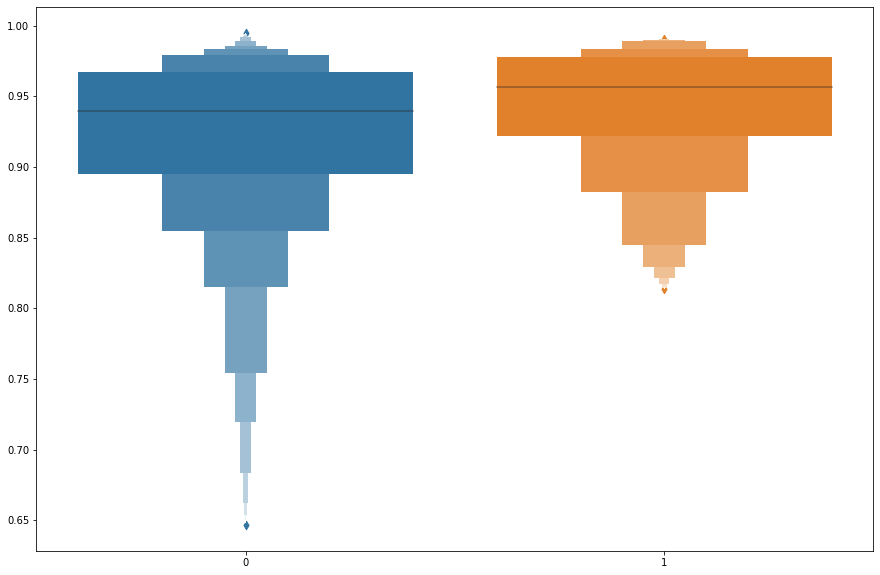

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.boxenplot(x=same_reviewer, y=similarity)
plt.show()

As shown by the graph above, there is little difference between the average similarity scores of reviews that were written by the same reviewer (orange) and those written by different reviews (blue), further confirming that the similarity value does not allow us to determine which reviews were written by the same reviewer for this dataset.

### Accuracy Score

Given that all these reviews are written about the same topic (Harry Potter books), 0.8 seems a reasonable similarity value that two reviews should have if they were written by the samee reviewer. If we consider a similarity score of 0.8 or higher to be an indication that two reviews were written by the same reviewer, and a similarity value lower than 0.8 to indicate that they were written by a different reviewer, we can calculate an approximate score for the similarity analysis. This is just an approximate score, as we cannot directly calculate a score based on these similarity values. As shown below, the calculated score is very low at 8.33%, which suggests that the similarity function was not very successful in determining if two reviews were written by the same reviewer.

In [30]:
count_good_pos=0
count_good_neg=0
count_bad=0

for i in result: 
    if i[0]==1 and i[1]>=0.8:
        count_good_pos +=1
    elif i[0]==0 and i[1]<0.8:
        count_good_neg +=1
    else: 
        count_bad+=1

percentage_good = (count_good_pos + count_good_neg)/(count_good_pos + count_good_neg + count_bad)        
print(f'\nNumber of true (classified same and same in fact):           {count_good_pos}')
print(f'Number of true (classified different and different in fact): {count_good_neg}')
print(f'Number of false:                                             {count_bad}')
print(f'\nPercentage of similarity scores that accurately reflected review authorship: {percentage_good:.2%}')


Number of true (classified same and same in fact):           17
Number of true (classified different and different in fact): 31
Number of false:                                             528

Percentage of similarity scores that accurately reflected review authorship: 8.33%


In [33]:
true_pos = 0
true_neg = 0
false_pos = 0
false_neg = 0
for i in simi.index:
    if simi.loc[i, 'hp1_reviewer_name'] == simi.loc[i, 'hp2_reviewer_name'] and simi.loc[i, 'similar_score'] > 0.97:
        true_pos += 1
    elif simi.loc[i, 'hp1_reviewer_name'] != simi.loc[i, 'hp2_reviewer_name'] and simi.loc[i, 'similar_score'] <= 0.97:
        true_neg += 1
    elif simi.loc[i, 'hp1_reviewer_name'] != simi.loc[i, 'hp2_reviewer_name'] and simi.loc[i, 'similar_score'] > 0.97:
        false_pos += 1
    else:
        false_neg += 1
total = true_pos + true_neg + false_pos + false_neg
print(f'\nNumber of true (classified same and same in fact):                         {true_pos}')
print(f'Number of true (classified different and different in fact):               {true_neg}')
print(f'Number of classified as same but different in fact (i.e., false positve):  {false_pos}')
print(f'Number of classified as different but same in fact (i.e., false negative): {false_neg}')
print(f'\nPercentage of true: {(true_pos+true_neg)/total:.2%}')
print(f'Percentage of false positive: {false_pos/total:.2%}')
print(f'Percentage of false negative: {false_neg/total:.2%}')


Number of true (classified same and same in fact):                         1
Number of true (classified different and different in fact):               544
Number of classified as same but different in fact (i.e., false positve):  15
Number of classified as different but same in fact (i.e., false negative): 16

Percentage of true: 94.62%
Percentage of false positive: 2.60%
Percentage of false negative: 2.78%



Result above shows that accuracy rate is only 8.33% under the senario with a criteria of 0.8. It is because that it incorrectly classified 528 out of 559 (94%) reviews that were written by different reviewers as ones from the same reviewer although it found out all reviews that truely were written by the same reviewer. Then we increased the criteria from 0.8 to 0.97. Accordingly, the accuracy rate is improved significantly from 8.33% to 94.62%. In particular, the rate that we correctly found the reviews that were truely from different reviewers as ones that were written by different reviewers surged while only 1 out of the 17 reviews that were written by the same reviewer was found out successfully. By contrast, both the percentage of false positive and false negtive are low, only 2.6% and 2.78% respectively. It means that if we use a high similarity value as the classification criteria, we could successfully determine reviews that come from different reviewers but fail to find those written from the same reviewer.

## Other Experiments

### Calculating a Similarity Value Using "en_core_web_md"

For this part, we conducted the similarity analysis again  and tried aother pre_trained model which is built in Spacy to substitute the one called "en_core_web_lg" due to its bad performance.

***Install necessary packages:***

Note: Run the following commands in terminal first to install necessary package:
    
     --------------------------------------
     conda install -c conda-forge spacy
     python -m spacy download en_core_web_md
     --------------------------------------
    

In [34]:
import spacy
nlp = spacy.load('en_core_web_md') #refer from: https://spacy.io/models/en

In [35]:
similar_score = []
pair_review = []
hp1_reviewer_name = []
hp2_reviewer_name = []
for i in book_1.index:
    text1 = nlp(reviews_corr_useful_1[i])
#     text1 = nlp(reviews_hp1.loc[i, 'review'])
    for j in book_2.index:
        text2 = nlp(reviews_corr_useful_2[j])
#         text2 = nlp(reviews_hp2.loc[j, 'review'])
        pair_review.append((f'hp1_r{i}', f'hp2_r{j}'))
        hp1_reviewer_name.append(book_1.loc[i,'reviewer_name'])
        hp2_reviewer_name.append(book_2.loc[j,'reviewer_name'])
        similar_score.append(text2.similarity(text1))

simi = pd.DataFrame()
simi['pair_review'] = pd.Series(pair_review)
simi['hp1_reviewer_name'] = pd.Series(hp1_reviewer_name)
simi['hp2_reviewer_name'] = pd.Series(hp2_reviewer_name)
simi['similar_score'] = pd.Series(similar_score)
simi.head()

,pair_review,hp1_reviewer_name,hp2_reviewer_name,similar_score
0,"(hp1_r0, hp2_r0)",Lora,Lora,0.963351
1,"(hp1_r0, hp2_r1)",Lora,Zoë,0.940110
2,"(hp1_r0, hp2_r2)",Lora,Sasha Alsberg,0.939935
3,"(hp1_r0, hp2_r3)",Lora,Jayson,0.864491
4,"(hp1_r0, hp2_r4)",Lora,Amanda Patterson,0.832686


#### Evaluate Results of Similarity Analysis

In [36]:
info_same_reviewer = []
count_diff_rev = 0
t_simi_diff_rev = 0
t_simi_same_rev = 0
for i in simi.index:
    if simi.loc[i, 'hp1_reviewer_name'] == simi.loc[i, 'hp2_reviewer_name']:
        pair_review = simi.loc[i, 'pair_review']
        reviewer = simi.loc[i, 'hp1_reviewer_name']
        similarity = round(simi.loc[i, 'similar_score'], 4)
        t_simi_same_rev += simi.loc[i, 'similar_score']
        info_same_reviewer.append((pair_review, reviewer, similarity))
    else:
        count_diff_rev += 1
        t_simi_diff_rev += simi.loc[i, 'similar_score']
print('The information of reviews from same reviewers:\n')
print(info_same_reviewer)
print()
print(f'total pairs of reviews from same reviewers                   = {len(info_same_reviewer)}')
print(f'avarage similarity score of reviews from same reviewers      = {t_simi_same_rev/len(info_same_reviewer):.2%}')
print(f'avarage similarity score of reviews from different reviewers = {t_simi_diff_rev/count_diff_rev:.2%}')
print()

The information of reviews from same reviewers:

[(('hp1_r0', 'hp2_r0'), 'Lora\xa0', 0.9634), (('hp1_r1', 'hp2_r1'), 'Zoë\xa0', 0.795), (('hp1_r5', 'hp2_r4'), 'Amanda Patterson\xa0', 0.8283), (('hp1_r8', 'hp2_r7'), 'Nina', 0.9645), (('hp1_r11', 'hp2_r20'), 'Renee Godding', 0.8268), (('hp1_r12', 'hp2_r9'), 'Cindy Pham', 0.9729), (('hp1_r13', 'hp2_r10'), 'Em Lost In Books', 0.7204), (('hp1_r14', 'hp2_r18'), 'Samantha', 0.85), (('hp1_r15', 'hp2_r17'), 'ambsreads', 0.9231), (('hp1_r16', 'hp2_r22'), 'Maureen', 0.896), (('hp1_r17', 'hp2_r15'), 'Lara', 0.79), (('hp1_r18', 'hp2_r21'), 'Elyse Walters', 0.9576), (('hp1_r19', 'hp2_r16'), 'Kainat(HUFFLEPUFF & PROUD)', 0.8478), (('hp1_r20', 'hp2_r11'), 'Virginia Ronan Herondale', 0.9921), (('hp1_r21', 'hp2_r23'), 'James Lafayette Tivendale', 0.9495), (('hp1_r22', 'hp2_r19'), 'Ahmad Sharabiani\xa0', 0.9426), (('hp1_r23', 'hp2_r14'), 'Khanh, first of her name, mother of bunnies\xa0', 0.9274)]

total pairs of reviews from same reviewers               

This result shows that the average similarity score of reviews from same reviewers is slightly higher than the value calcualted by the model named "en_core_web_lg", but still cannot judge which two reviews are written by same reviewers.

#### Accuracy Score

In [37]:
true_pos = 0
true_neg = 0
false_pos = 0
false_neg = 0
for i in simi.index:
    if simi.loc[i, 'hp1_reviewer_name'] == simi.loc[i, 'hp2_reviewer_name'] and simi.loc[i, 'similar_score'] > 0.97:
        true_pos += 1
    elif simi.loc[i, 'hp1_reviewer_name'] != simi.loc[i, 'hp2_reviewer_name'] and simi.loc[i, 'similar_score'] <= 0.97:
        true_neg += 1
    elif simi.loc[i, 'hp1_reviewer_name'] != simi.loc[i, 'hp2_reviewer_name'] and simi.loc[i, 'similar_score'] > 0.97:
        false_pos += 1
    else:
        false_neg += 1
total = true_pos + true_neg + false_pos + false_neg
print(f'\nNumber of true (classified same and same in fact):                         {true_pos}')
print(f'Number of true (classified different and different in fact):               {true_neg}')
print(f'Number of classified as same but different in fact (i.e., false positve):  {false_pos}')
print(f'Number of classified as different but same in fact (i.e., false negative): {false_neg}')
print(f'\nPercentage of true: {(true_pos+true_neg)/total:.2%}')
print(f'Percentage of false positive: {false_pos/total:.2%}')
print(f'Percentage of false negative: {false_neg/total:.2%}')


Number of true (classified same and same in fact):                         2
Number of true (classified different and different in fact):               541
Number of classified as same but different in fact (i.e., false positve):  18
Number of classified as different but same in fact (i.e., false negative): 15

Percentage of true: 94.27%
Percentage of false positive: 3.12%
Percentage of false negative: 2.60%
